In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

np.random.seed(42)


def plot_matrix(M, title, xlabel, ylabel, yticks, xticks):
    fig, ax = plt.subplots()
    fig.suptitle(title)
    plt.imshow(M)
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(range(M.shape[0]), yticks)
    plt.xticks(range(M.shape[1]), xticks)

    mean = M.mean()
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            color = 'w' if M[i, j] < mean else 'k'
            text = ax.text(j, i, M[i, j],
                           ha="center", va="center", color=color)

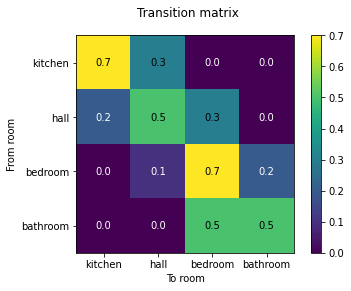

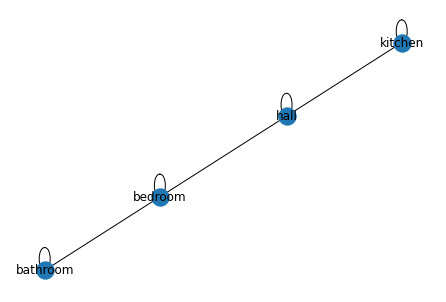

In [2]:
classes = ['kitchen', 'hall', 'bedroom', 'bathroom']

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.3, 0.1, 0.5, 0.1])
# The transition matrix between rooms. rows sum to one
transmat = np.array([[0.7, 0.3, 0.0, 0.0],
                     [0.2, 0.5, 0.3, 0.0],
                     [0.0, 0.1, 0.7, 0.2],
                     [0.0, 0.0, 0.5, 0.5]])

plot_matrix(transmat, title='Transition matrix', ylabel='From room', xlabel='To room', yticks=classes, xticks=classes)

plt.savefig('transition_matrix.pdf')

plt.figure()
G = nx.from_numpy_matrix(transmat > 0)
G = nx.relabel.relabel_nodes(G, {i:name for i, name in enumerate(classes)})
pos=nx.spring_layout(G)
nx.draw(G, pos)
labels = nx.draw_networkx_labels(G, pos)



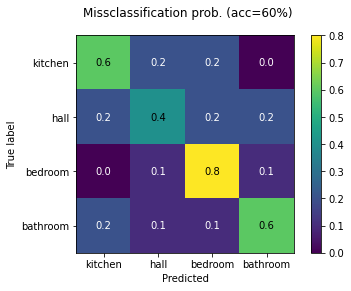

In [9]:
# Emission probabilities: rows sum to one
# Probability of observing a label prediction given the true label
emissionprob = np.array([[0.6, 0.2, 0.2, 0.0],
                         [0.2, 0.4, 0.2, 0.2],
                         [0.0, 0.1, 0.8, 0.1],
                         [0.2, 0.1, 0.1, 0.6]])

plot_matrix(emissionprob, xlabel='Predicted', ylabel='True label', yticks=classes, xticks=classes,
            title='Missclassification prob. (acc={:.0f}%)'.format(100*sum(np.diag(emissionprob)/len(startprob))))

plt.savefig('confusion_matrix.pdf')

Text(0.5, 0, 'Time')

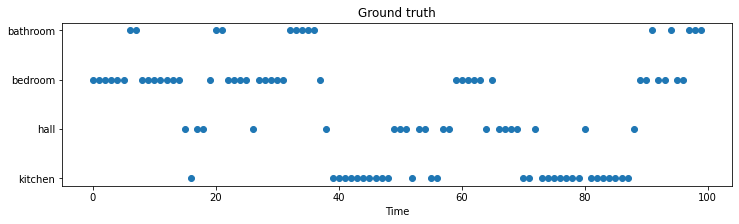

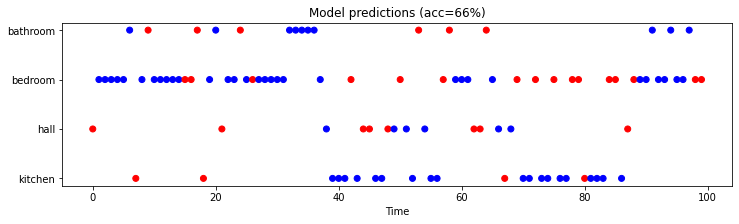

In [4]:
generator = hmm.MultinomialHMM(n_components=len(classes))

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
generator.startprob_ = startprob
generator.transmat_ = transmat
generator.emissionprob_ = emissionprob

n_samples = 100
_, Y = generator.sample(n_samples=n_samples)
Z, Y = generator.sample(n_samples=n_samples, currstate=Y[-1])
Y = Y.reshape(-1, 1)

time = range(n_samples)
plt.figure(figsize=(12, 3))
plt.title('Ground truth')
plt.scatter(time, Y)
plt.yticks(range(len(startprob)), classes)
plt.xlabel('Time')

plt.figure(figsize=(12, 3))
acc = np.mean(Z==Y)
plt.title('Model predictions (acc={:.0f}%)'.format(acc*100))
plt.scatter(time, Z, c=Z==Y, cmap='bwr_r')
plt.yticks(range(len(startprob)), classes)
plt.xlabel('Time')

[0.3 0.1 0.5 0.1]
(4,)
1.0


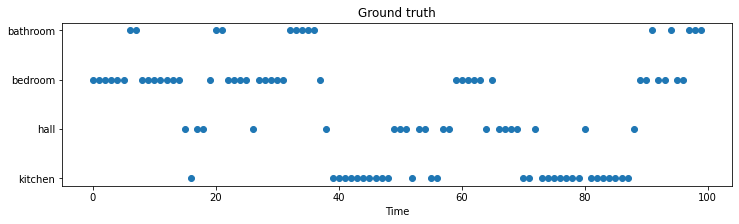

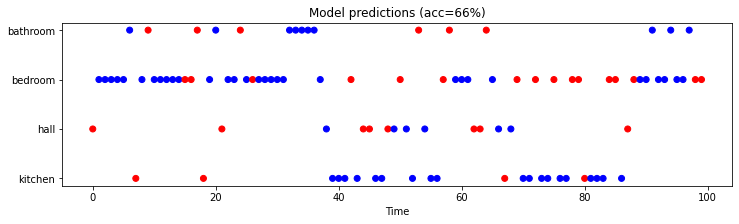

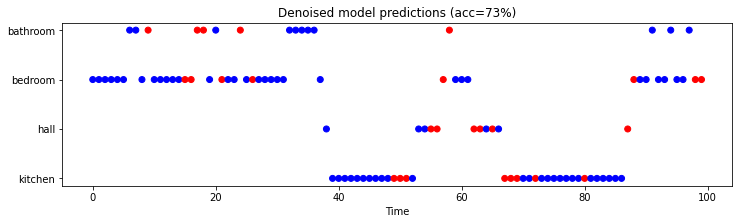

In [8]:
denoiser = hmm.MultinomialHMM(n_components=len(classes))
# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
denoiser.startprob_ = startprob
denoiser.transmat_ = transmat
denoiser.emissionprob_ = emissionprob

print(denoiser.startprob_)
print(denoiser.startprob_.shape)
print(denoiser.startprob_.sum(axis=0))
Z_denoised = denoiser.predict(Z).reshape(-1, 1)

time = range(n_samples)
plt.figure(figsize=(12, 3))
plt.title('Ground truth')
plt.scatter(time, Y)
plt.yticks(range(len(startprob)), classes)
plt.xlabel('Time')
plt.savefig('toy_truth.pdf')


plt.figure(figsize=(12, 3))
acc = np.mean(Z==Y)
plt.title('Model predictions (acc={:.0f}%)'.format(acc*100))
plt.scatter(time, Z, c=Z==Y, cmap='bwr_r')
plt.yticks(range(len(startprob)), classes)
plt.xlabel('Time')
plt.savefig('toy_predictions.pdf')

plt.figure(figsize=(12, 3))
acc = np.mean(Z_denoised==Y)
plt.title('Denoised model predictions (acc={:.0f}%)'.format(acc*100))
plt.scatter(time, Z_denoised, c=Z_denoised==Y, cmap='bwr_r')
plt.yticks(range(len(startprob)), classes)
plt.xlabel('Time')
plt.savefig('toy_improvement.pdf')